In [14]:
import math, glob, os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import importlib
import wrftools as wrf
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [15]:
importlib.reload(wrf)

run='run_02_land_t06'
wolist=wrf.wolist(run)
wolist=(wolist[1], wolist[10])
flistw=[wrf.wopath(run,wo) for wo in wolist]

run='run_02_land_dry_t06'
wolist=wrf.wolist(run)
wolist=(wolist[1], wolist[10])
flistd=[wrf.wopath(run,wo) for wo in wolist]

flist=flistw+flistd

r=wrf.getRcoord(flist[0])

# strs=['0h','1h wet','10h wet','1h dry','10h dry']
strs=['1h wet','10h wet','1h dry','10h dry']

In [18]:
def plot_rx_profs(vname,vstr,clim1,clim2,cmap='Blues',txtcol='w',levs=[-40,-20,20,40,60,80]):
    fig,axs=plt.subplots(2,2,figsize=(7,6),dpi=200)
    plt.subplots_adjust(hspace=0.25,wspace=0.25,bottom=0.17)
#     axs.flat[3].axis('off')
#     cl=80
#     axss=axs.flat[[0,1,2,4,5]]
    axss=axs
    im=[]
    for n,fname in enumerate(flist):
        if n%2 == 0:
            clim=clim1
        else:
            clim=clim2
    
        ax=axss.flat[n]
        vr=wrf.getWRF(fname,vname,z='full',vtype='az')
#         blh=wrf.getWRF(fname,'blh',z=0,vtype='az')
        z=wrf.getHeightCoord(fname)
        r=wrf.getRcoord(fname)
        im.append(ax.pcolormesh(r,z[1:]/1000,vr.T,cmap=plt.get_cmap(cmap),shading='nearest'))
        
        vmax,rmax,zmax,t=wrf.wrf2max(fname,'V',z=0)
        ax.axvline(rmax,ls='--',lw=2,color=txtcol)
        
        ax.contour(r,z[1:]/1000,vr.T,levs,colors=txtcol,linestyles='dashed',linewidths=.75)
        ax.contour(r,z[1:]/1000,vr.T,[0],colors=txtcol,linestyles='dotted',linewidths=1)
                
#         vmax,rmax,zmax,t=wrf.wrf2max(fname,'vt',z=0)
#         ax.axvline(rmax,ls='--',lw=1,color=txtcol)
#         ax.plot(r,blh/1000,'--',lw=2,color=txtcol)
    #     imclim=im.get_clim()
    #     im.set_clim(0,imclim[1])
        im[-1].set_clim(clim)
        ax.set_xlim(0,100)
        ax.set_ylim(0,10)
        ax.set_xlabel('R (km)')
        ax.set_ylabel('z (km)')
    #     ax.text(10,15,str(n)+'h',color='w')
#         cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
        ax.text(0.99,0.99,strs[n],color=txtcol,ha='right', va='top',transform=ax.transAxes)
    
    cbaxes = fig.add_axes([0.15, 0.05, 0.3, 0.15]) 
    cbaxes.axis('off')
    plt.colorbar(im[0],ax=cbaxes,orientation='horizontal',aspect=30,label=vstr+ ' (m/s)',shrink=1.0)
    
    cbaxes = fig.add_axes([0.58, 0.05, 0.3, 0.15]) 
    cbaxes.axis('off')
    plt.colorbar(im[1],ax=cbaxes,orientation='horizontal',aspect=30,label=vstr+ ' (m/s)',shrink=1.0)

Creating: run_02_land_t06/wrfout_d03_2007-09-06_01:00:00.vt.az.npy
Creating: run_02_land_t06/wrfout_d03_2007-09-06_01:00:00.vt.raw.npy
Creating: run_02_land_t06/wrfout_d03_2007-09-06_01:00:00.cc.raw.npy


/net/wrfstore6/disk1/nsparks/itc/python/paper_plots/wrftools.py:254: RuntimeWarning: invalid value encountered in true_divide
  return(dx/mag,dy/mag)


Creating: run_02_land_t06/wrfout_d03_2007-09-06_01:00:00.cc.raw.npy
Creating: run_02_land_t06/wrfout_d03_2007-09-06_10:00:00.vt.az.npy
Creating: run_02_land_t06/wrfout_d03_2007-09-06_10:00:00.vt.raw.npy
Creating: run_02_land_t06/wrfout_d03_2007-09-06_10:00:00.cc.raw.npy
Creating: run_02_land_t06/wrfout_d03_2007-09-06_10:00:00.cc.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00.vt.az.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00.vt.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00.cc.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00.cc.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_10:00:00.vt.az.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_10:00:00.vt.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_10:00:00.cc.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_10:00:00.cc.raw.npy
Creating: run_02_land_t06/wrfout_d03_2007-09-06_01:00:00.vr.az.npy
Creating: run_02_lan

<ipython-input-18-5ec168c62359>:25: UserWarning: No contour levels were found within the data range.
  ax.contour(r,z[1:]/1000,vr.T,levs,colors=txtcol,linestyles='dashed',linewidths=.75)


Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00.vr.az.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00.vr.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00.cc.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_01:00:00.cc.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_10:00:00.vr.az.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_10:00:00.vr.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_10:00:00.cc.raw.npy
Creating: run_02_land_dry_t06/wrfout_d03_2007-09-06_10:00:00.cc.raw.npy


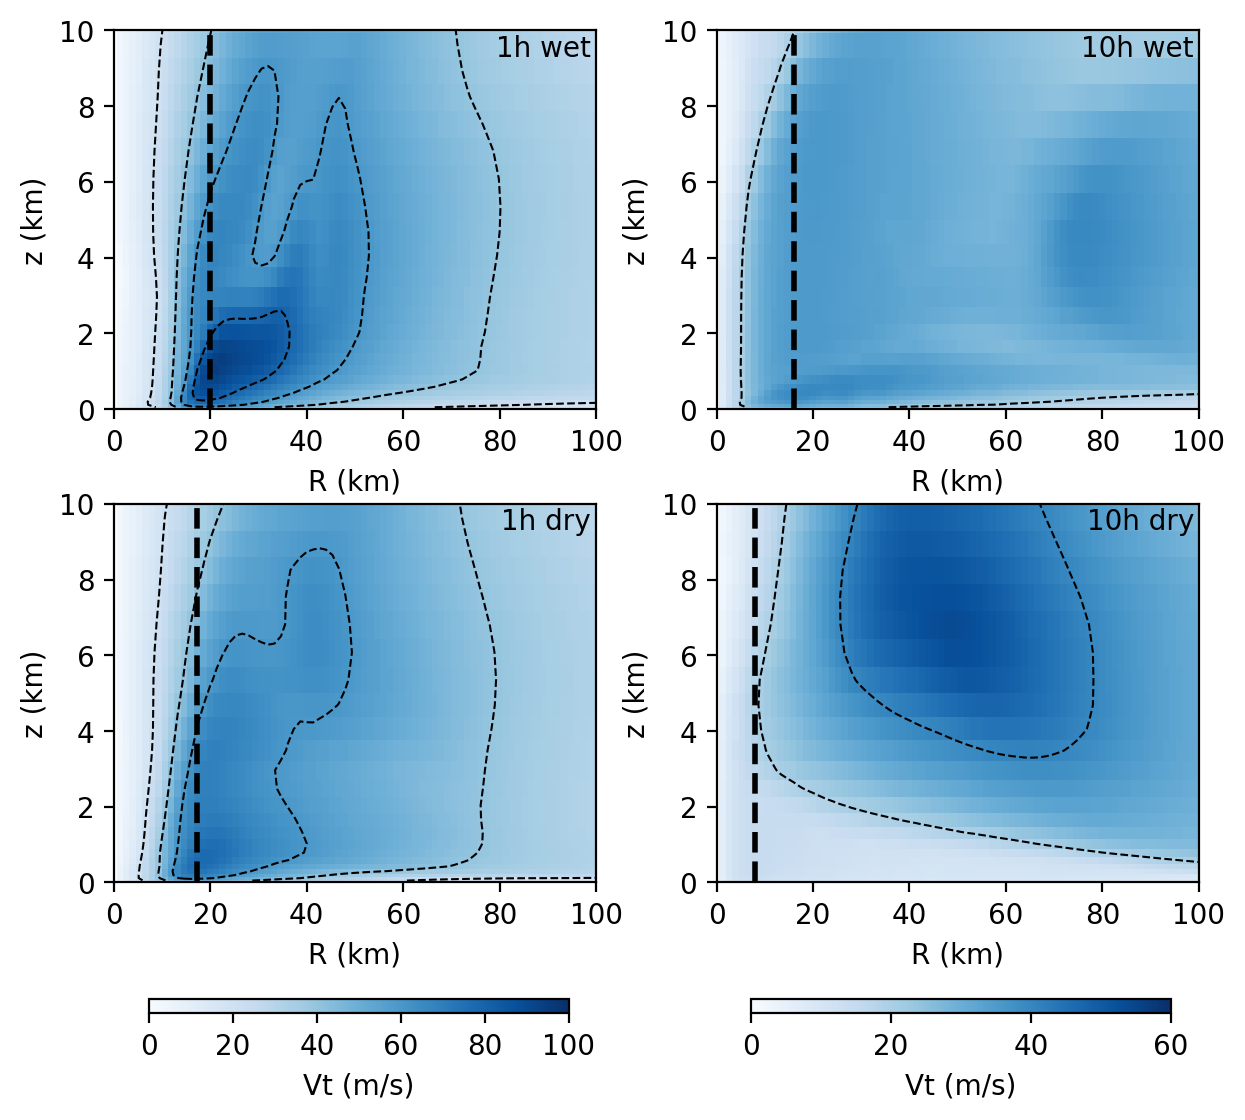

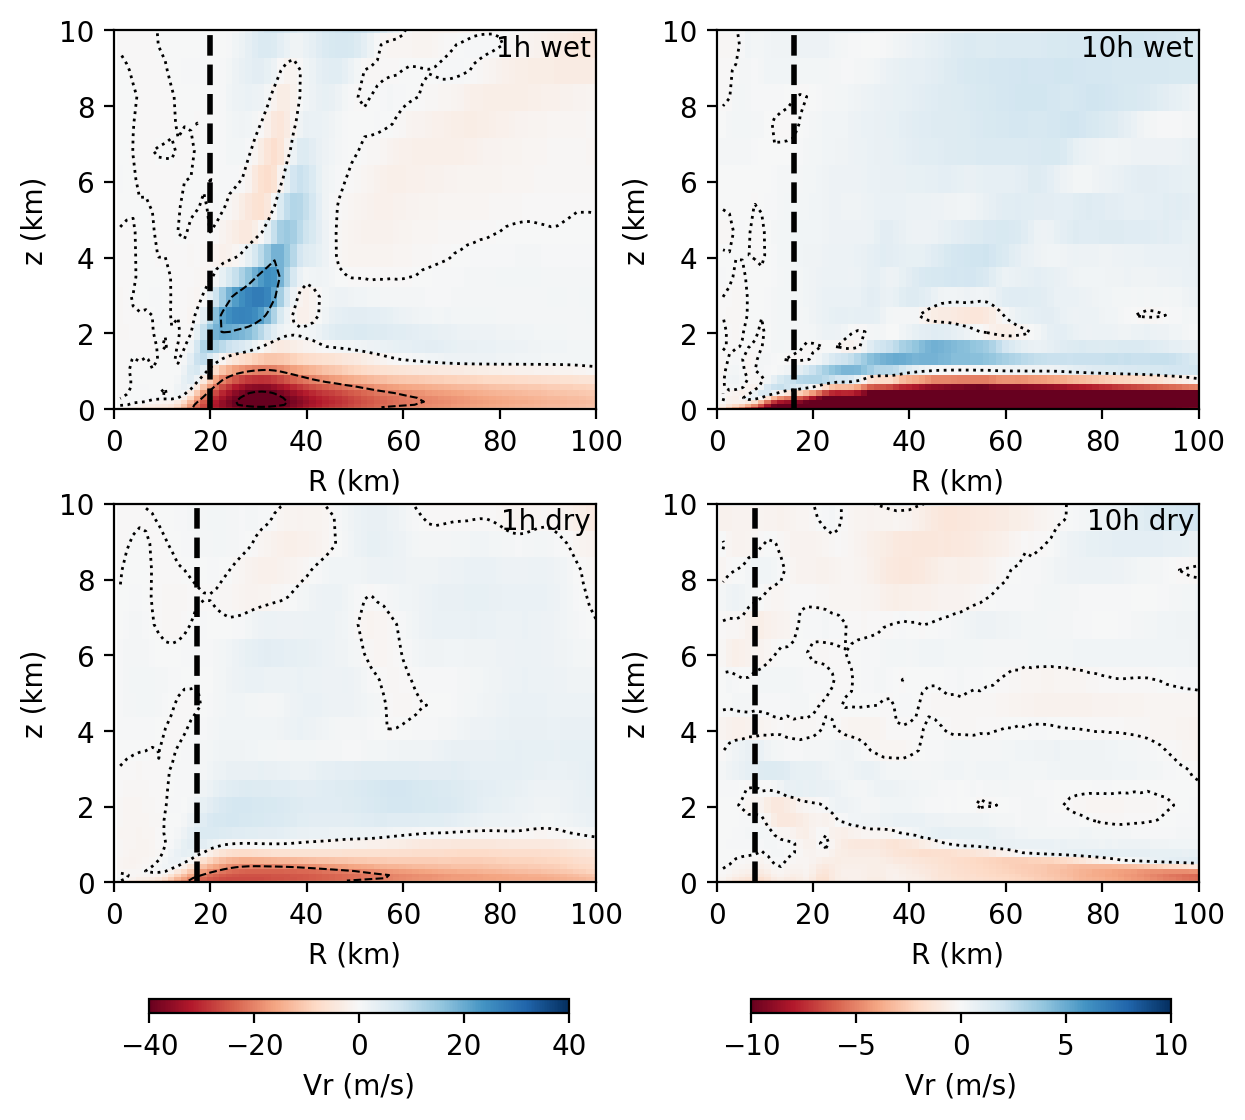

In [19]:
plot_rx_profs('vt','Vt',(0,100),(0,60),txtcol='k')
plot_rx_profs('vr','Vr',(-40,40),(-10,10),cmap='RdBu',txtcol='k')

In [9]:
# vr=[wrf.getWRF(wopathlist[0],'vr',type='azdwcm',z='full',force=True) for fname in flist]

# fig,axs=plt.subplots(1,1,figsize=(10,8),dpi=100)
# def plot_sub(ax,xs,ylab):
#     for n,x in enumerate(xs):
#         ax.plot(r,x,color=cmap(n))
#         ax.grid(True)
#         ax.set_xlabel('R (km)')
#         ax.set_ylabel(ylab)
# cmap=cm.get_cmap('viridis',len(vr))

# plot_sub(axs,vr, 'Density Weighted CA Vr (m/s)' )